In [16]:
import tensorflow as tf
from keras.layers import Conv2D, Flatten, BatchNormalization, Input, Conv2DTranspose, Reshape
from keras import datasets
from keras import models
import matplotlib.pyplot as plt
import numpy as np

## Load MNIST

In [17]:
(mnist_x_train, _), (mnist_x_test, _) = datasets.mnist.load_data()
mnist_x_train, mnist_x_test = mnist_x_train.astype('float32')/255., mnist_x_test.astype('float32')/255.
mnist_x_train[0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.14117648,
       0.36862746, 0.6039216 , 0.6666667 , 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.88235295, 0.6745098 ,
       0.99215686, 0.9490196 , 0.7647059 , 0.2509804 , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

(60000, 28, 28)

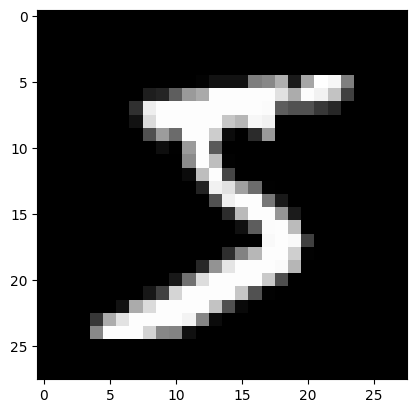

In [18]:
plt.imshow(mnist_x_train[0], cmap='gray')
mnist_x_train.shape

# Load and transform CIFAR-10

In [19]:
(_, _), (cifar_x_test, cifar_y_test) = datasets.cifar10.load_data()
cifar_x_test = cifar_x_test.astype('float32')/255.
cifar_x_test =  cifar_x_test.mean(axis=3)
cifar_x_test = cifar_x_test[...,tf.newaxis]
cifar_x_test = tf.image.resize(cifar_x_test, (28, 28))
cifar_x_test = np.reshape(cifar_x_test, (-1, 28, 28))
cifar_x_test.shape

(10000, 28, 28)

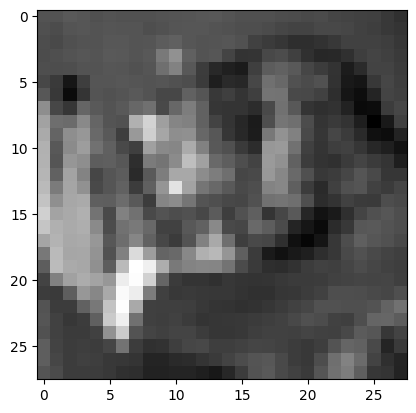

In [20]:
plt.imshow(cifar_x_test[0], cmap='gray')

## Model

In [96]:
inp  = Input(shape=(28, 28, 1))
x = Conv2D(32, 3, activation='relu')(inp)
x = BatchNormalization()(x)
x = Conv2D(24, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(16, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(8, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(4, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(2, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)

x = Reshape((8, 8, 2))(x)
x = Conv2DTranspose(2, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(4, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(8, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(16, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(24, 5, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(1, 3, activation='relu', padding='same')(x)

model = models.Model(inp, x)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_66 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 22, 22, 24)        19224     
                                                                 
 batch_normalization_67 (Bat  (None, 22, 22, 24)       96        
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 18, 18, 16)        9616

In [97]:
history = model.fit(mnist_x_train, mnist_x_train, epochs=10, validation_data=(mnist_x_test, mnist_x_test))

Epoch 1/10
1875/1875 [==============================] - 30s 11ms/step - loss: 0.0327 - mae: 0.0756 - val_loss: 0.0192 - val_mae: 0.0525
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0166 - mae: 0.0467 - val_loss: 0.0140 - val_mae: 0.0430
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0133 - mae: 0.0399 - val_loss: 0.0121 - val_mae: 0.0376
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0118 - mae: 0.0367 - val_loss: 0.0108 - val_mae: 0.0352
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0108 - mae: 0.0345 - val_loss: 0.0098 - val_mae: 0.0316
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0100 - mae: 0.0328 - val_loss: 0.0100 - val_mae: 0.0317
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0095 - mae: 0.0318 - val_loss: 0.0086 - val_mae: 0.0295
Epoch 8/10
1875/1875 [==========================

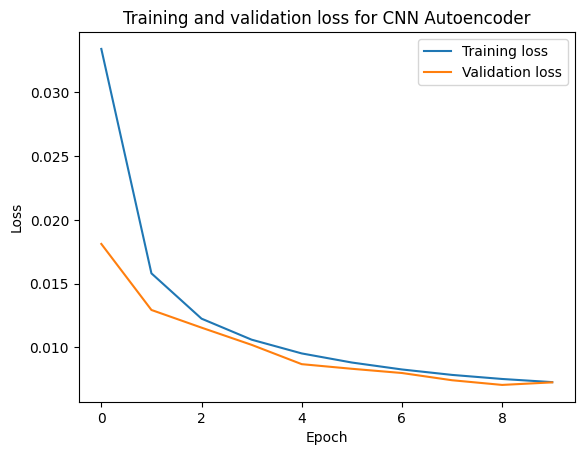

Text(0.5, 0, 'Epoch')

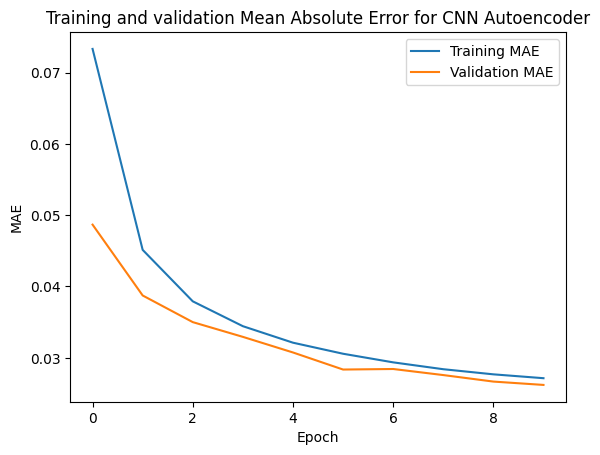

In [58]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training and validation loss for CNN Autoencoder')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Training and validation Mean Absolute Error for CNN Autoencoder')
plt.ylabel('MAE')
plt.xlabel('Epoch')

In [59]:
mnist_res_test = model.predict(mnist_x_test)
mnist_res_test = np.reshape(mnist_res_test, (-1, 28, 28))
mnist_res_train = model.predict(mnist_x_train)
mnist_res_train = np.reshape(mnist_res_train, (-1, 28, 28))
cifar_res = model.predict(cifar_x_test)
cifar_res = np.reshape(cifar_res, (-1, 28, 28))

313/313 [==============================] - 1s 3ms/step


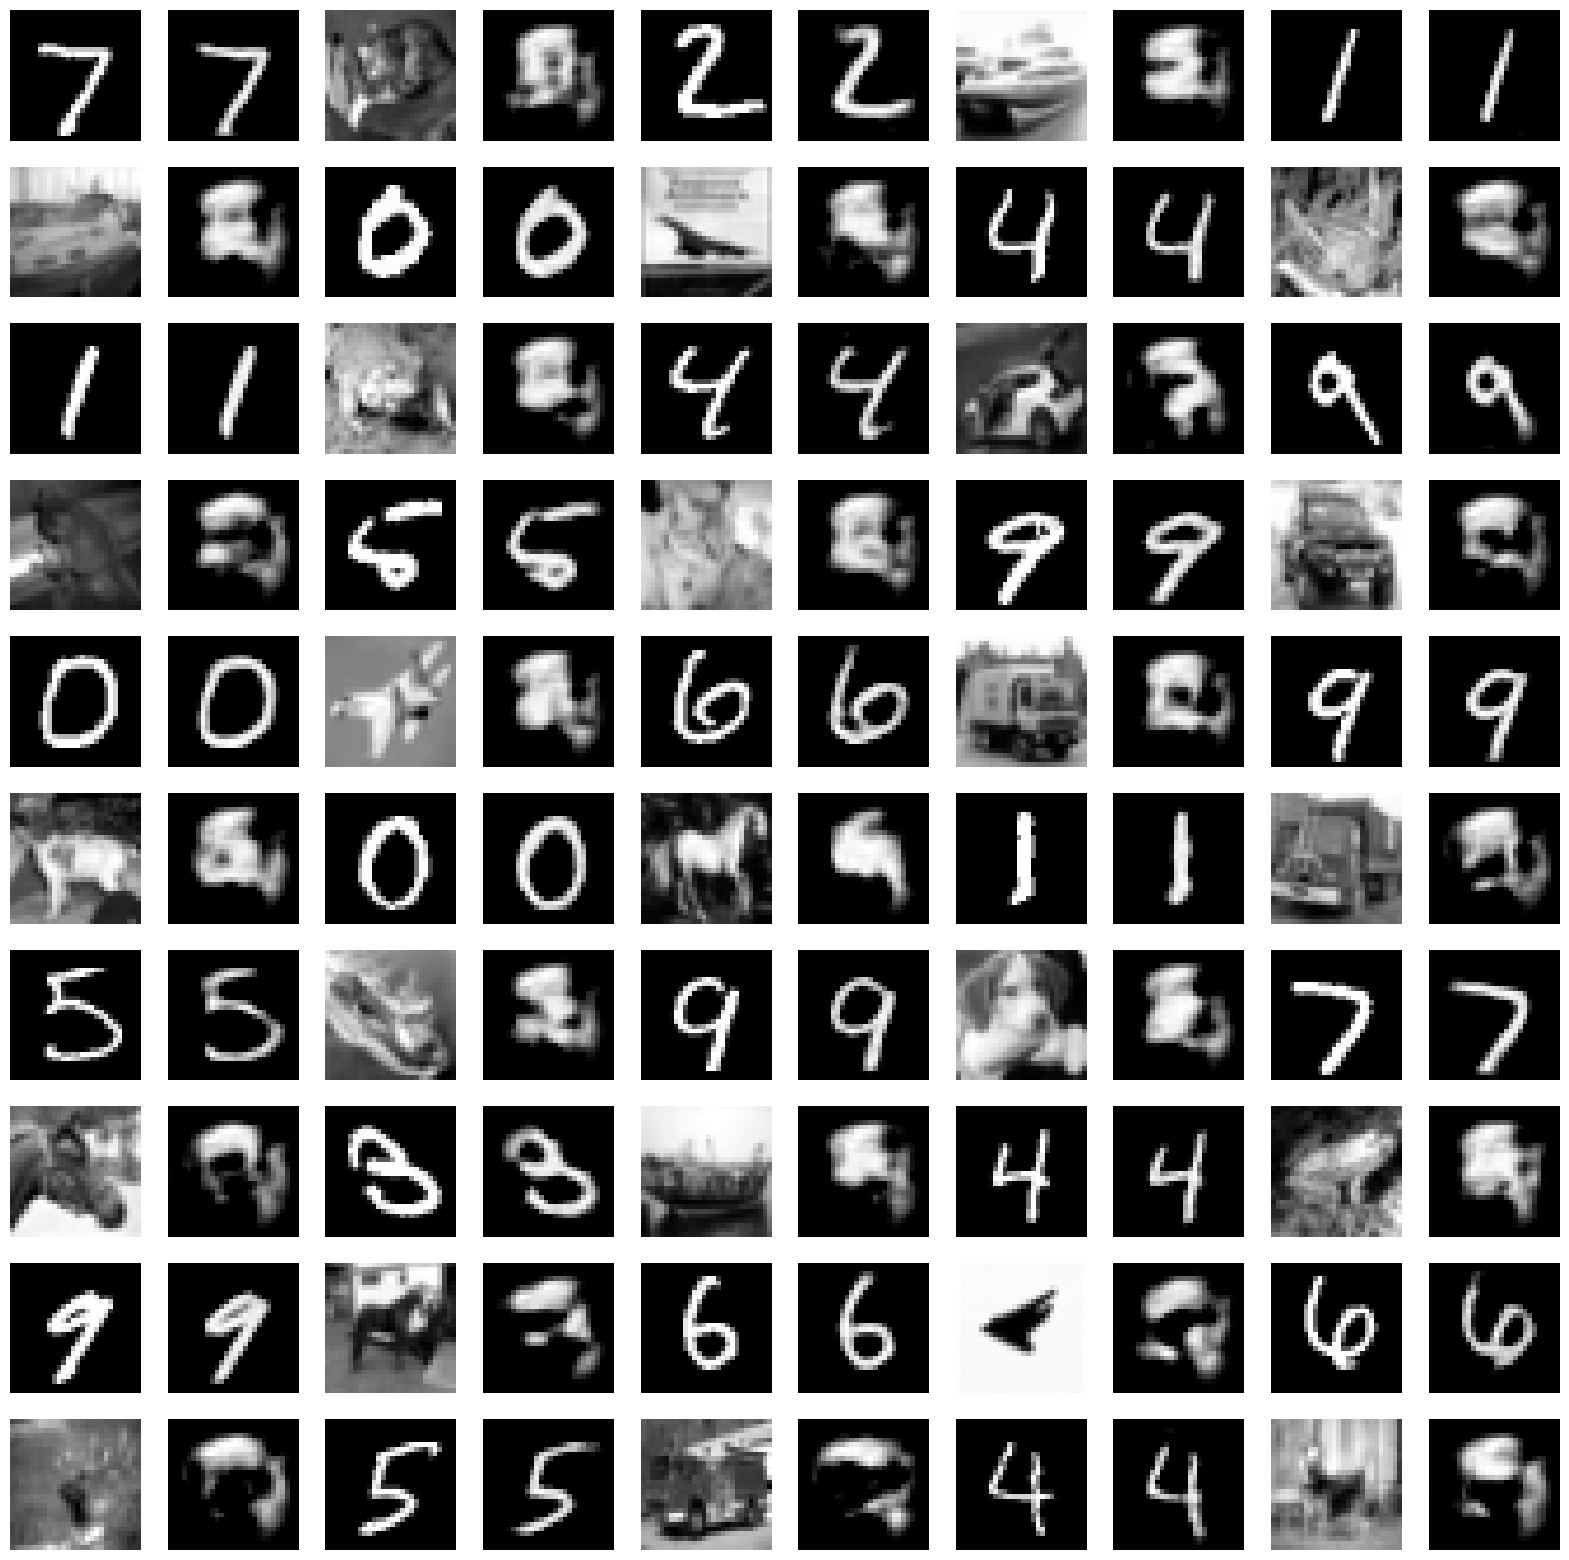

In [60]:
rows, cols = 10, 10
data = (mnist_x_test,mnist_res_test,cifar_x_test, cifar_res)
idx = 0
fig = plt.figure(figsize=(2*cols, 2*rows))
fig.tight_layout()
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(data[idx%4][idx//4], cmap='gray')
        plt.axis('off')
        idx += 1

In [66]:
losses = tf.keras.losses.mae(mnist_res_train, mnist_x_train)
mean, std = np.mean(losses), np.std(losses)
threshold = mean + std*2
print(f'{mean=:.4f}, {std=:.4f}, {threshold=:.4f}')

mean=0.0263, std=0.0287, threshold=0.0838


In [86]:
def evaluate(X, threshold=threshold, /, print_anomaly=None):
    predictions = model.predict(X, verbose=0)
    predictions = np.reshape(predictions, (-1, 28, 28))
    test_losses = tf.keras.losses.mae(predictions, X)
    test_loss = np.mean(test_losses, axis=1)
    if print_anomaly is True:
      print('FP: ', end='')
      print(*(test_loss>threshold).nonzero()[0], sep=', ')
    elif print_anomaly is False:
      print('FN: ', end='')
      print(*(test_loss<=threshold).nonzero()[0], sep=', ')
    normal, anomaly = len(test_loss[test_loss <= threshold]), len(test_loss[test_loss > threshold])
    return {'normal': normal, 'anomaly': anomaly, 'mean': np.mean(test_loss), 'std': np.std(test_loss)}

In [87]:
evaluate(mnist_x_test, threshold, print_anomaly=True)

FP: 4086


{'normal': 9999, 'anomaly': 1, 'mean': 0.026197303, 'std': 0.010350194}

In [88]:
evaluate(cifar_x_test, threshold, print_anomaly=False)

FN: 3582, 9246


{'normal': 2, 'anomaly': 9998, 'mean': 0.39052182, 'std': 0.09519127}

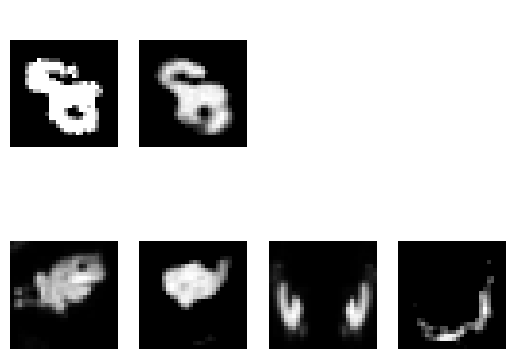

In [94]:
f, axarr = plt.subplots(2,4)
axarr[0,0].imshow(mnist_x_test[4086], cmap='gray')
axarr[0,1].imshow(mnist_res_test[4086], cmap='gray')
axarr[1,0].imshow(cifar_x_test[3582], cmap='gray')
axarr[1,1].imshow(cifar_res[3582], cmap='gray')
axarr[1,2].imshow(cifar_x_test[9246], cmap='gray')
axarr[1,3].imshow(cifar_res[9246], cmap='gray')
for r in range(2):
  for c in range(4):
    axarr[r,c].axis('off')

Text(0.5, 1.0, 'MAE loss for the MNIST and CIFAR-10 dataset\nafter autoencoder reconstruction')

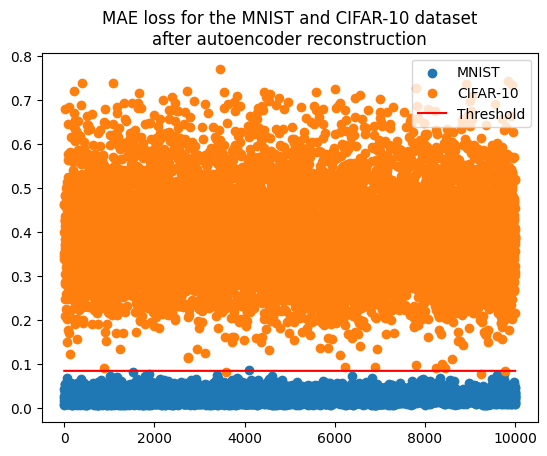

In [69]:
mnist_test_losses = tf.keras.losses.mae(mnist_res_test, mnist_x_test)
mnist_test_losses = np.mean(mnist_test_losses, axis=1)
cifar_test_losses = tf.keras.losses.mae(cifar_res, cifar_x_test)
cifar_test_losses = np.mean(cifar_test_losses, axis=1)
plt.scatter(np.arange(0, 10000, 1), mnist_test_losses)
plt.scatter(np.arange(0, 10000, 1), cifar_test_losses)
plt.plot(np.arange(0, 10000, 1), np.full(10000, threshold), color='red')
plt.legend(['MNIST', 'CIFAR-10', 'Threshold'])
plt.title('MAE loss for the MNIST and CIFAR-10 dataset\nafter autoencoder reconstruction')